# Machine Learning Project : Playstore Sentiment Analysis
## Gaith Masoudi

Importing Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

{}

In [2]:
#Reading Data
df = pd.read_csv('/content/googleplaystore_user_reviews.csv')

### EDA : Explorartory Data Analysis

In [3]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

### We will focus on two columns :  'Translated_Review' and Sentiment

In [5]:
df = df[['Translated_Review','Sentiment']]
df.rename(columns={"Translated_Review": "Review", "Sentiment": "Sentiment"}, inplace = True)

In [6]:
df.head()

,Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive


In [7]:
df.dropna(inplace= True)

In [8]:
df.shape

(37427, 2)

In [9]:
#Remove Duplicates
df.drop_duplicates(inplace = True, keep='first')

In [10]:
df.shape

(27994, 2)

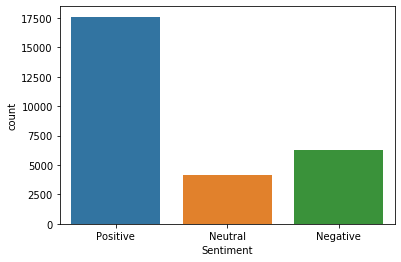

In [11]:
sns.countplot( df.Sentiment)

### Due to Hardware Limitation, we reduced our dataset by deleteing some on Positive reviews.

In [15]:
df_Pos = df[df.Sentiment == 'Positive']
df_Pos.reset_index(inplace = True, drop= True)
df_Neg = df[df.Sentiment == 'Negative']
df_Neg.reset_index(inplace = True, drop= True)
df_Neu = df[df.Sentiment == 'Neutral']
df_Neu.reset_index(inplace = True, drop= True)

In [16]:
df = pd.concat([df_Pos[:2000], df_Neg[:2000],df_Neu[:2000] ])
df.reset_index(inplace = True, drop= True)

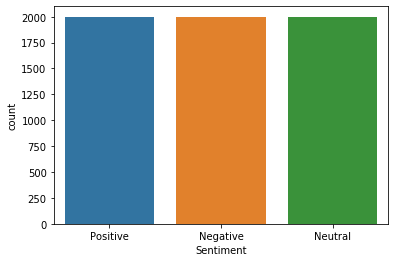

In [17]:
sns.countplot( df.Sentiment)

In [18]:
df.shape

(6000, 2)

##Cleaning and Preparing Text

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize as wt
from nltk.tokenize import punkt
from nltk.stem import PorterStemmer
from collections import defaultdict
from nltk.corpus import wordnet
from nltk import pos_tag
from collections import defaultdict
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [21]:
#We will use NLTk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stopwords = stopwords.words('english')

In [22]:
# Function to Remove Stopwords
def StopwordRm(text):
    filtred_text=''
    for word in text.split():
        if word not in stopwords:
            filtred_text = filtred_text + word+ ' '
    return filtred_text

In [23]:
# Function to Remove Punctuations
import string
punkt = list(string.punctuation)
def PunctRm(text):
    filtred_text = ''
    for x in text:
      if x not in punkt:
            filtred_text = filtred_text + x
    return filtred_text

In [24]:
#Function to Get the word Pos
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [25]:
lemmatizer = WordNetLemmatizer()
def Lemmetizer(text):
  filtred_text = ''
  for word in text.split():
          filtred_text = filtred_text + lemmatizer.lemmatize(word, get_wordnet_pos(word)) + ' '
  return filtred_text

In [26]:
#Apply all functions using column.apply
df.Review = df.Review.apply(str.lower) # LowerCase
df.Review = df.Review.apply(StopwordRm)
df.Review = df.Review.apply(PunctRm)

In [27]:
import time

In [28]:
df.Review = df.Review.apply(Lemmetizer)

In [31]:
df.head()

,Review,Sentiment
0,like eat delicious food thats im cooking food ...,Positive
1,help eat healthy exercise regular basis,Positive
2,work great especially go grocery store,Positive
3,best idea u,Positive
4,best way,Positive


#WordCloud 

In [30]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [0]:
Positive=""
Negative=""
Neutral=""
for index,row in df.iterrows():
    if(row["Sentiment"]=="Positive"):
        Positive=Positive+" "+row["Review"]
    elif (row["Sentiment"]=="Negative"):
        Negative=Negative+" "+row["Review"]
    else:
        Neutral=Neutral+" "+row["Review"]

In [0]:
wordcloud_Positive=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(Positive)
wordcloud_Neutral=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(Negative)
wordcloud_Negative=WordCloud(max_font_size=100, max_words=100, background_color="white").generate(Neutral)

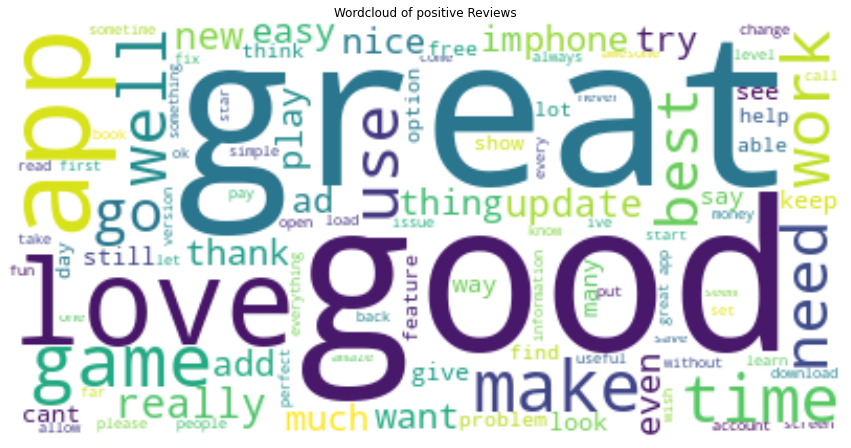

In [33]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_Positive, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of positive Reviews")
plt.show()

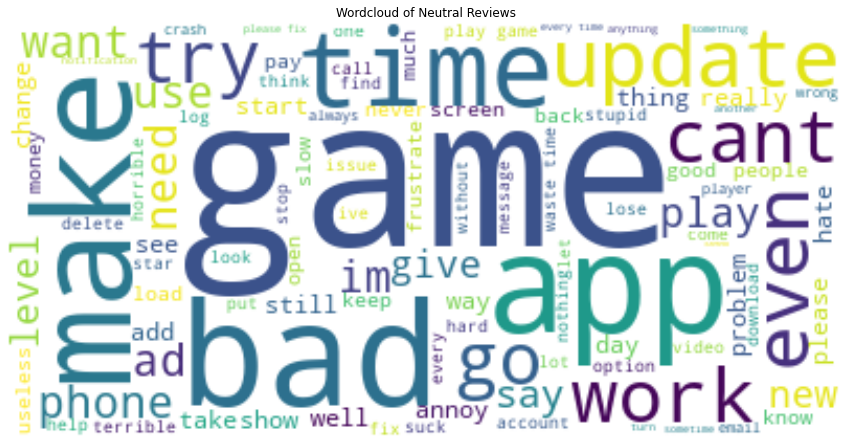

In [34]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_Neutral, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Neutral Reviews")
plt.show()

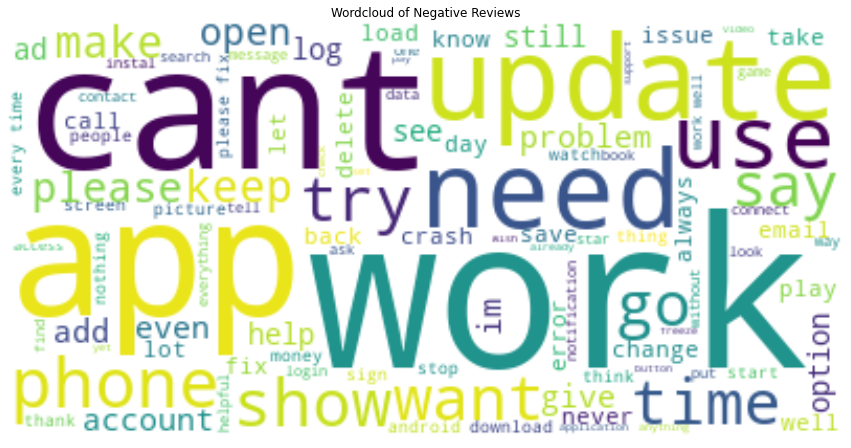

In [35]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_Negative, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of Negative Reviews")
plt.show()

### Train Test Split

In [32]:
X = df.Review
y = df.Sentiment

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

##Modeling

In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

####Count Vectorizer
<img src="https://raw.githubusercontent.com/cassieview/intro-nlp-wine-reviews/master/imgs/vectorchart.PNG" alt="drawing" width="600"/>

In [35]:
count_vect = CountVectorizer(ngram_range=(1,2))

In [36]:
#Let's see what it does exactly
Example = [ 'this is the first line.',
           'this line is the second line.',
           'and this is the third.',
           'is this the fifth line?']

In [0]:
Vect_Cv = count_vect.fit_transform(Example)

In [46]:
count_vect.get_feature_names()

['and',
 'and this',
 'fifth',
 'fifth line',
 'first',
 'first line',
 'is',
 'is the',
 'is this',
 'line',
 'line is',
 'second',
 'second line',
 'the',
 'the fifth',
 'the first',
 'the second',
 'the third',
 'third',
 'this',
 'this is',
 'this line',
 'this the']

### Term ferquency - Inverse document frequency : <br> Reduce the weightage of more common words like (the, is, an etc.) which occur in all document. <br> Wiki : TF_IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

<img src="https://miro.medium.com/max/3604/1*qQgnyPLDIkUmeZKN2_ZWbQ.png" alt="drawing" width="500"/><img src="https://miro.medium.com/max/876/1*_OsV8gO2cjy9qcFhrtCdiw.jpeg" alt="drawing" width="455"/>


In [0]:
Tfidf = TfidfTransformer()

### We can combine the two functions using tfidfVectorizer

In [53]:
Tfidf_Vect = TfidfVectorizer()

In [54]:
X_train = Tfidf_Vect.fit_transform(x_train)
X_test = Tfidf_Vect.transform(x_test)

###Model Selection
![Image](https://miro.medium.com/max/1400/1*tpOZa-wju9pD-5vFd-Es-g.png)

In [37]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
import time

In [39]:
names = ["Gaussian Naive Bayes", "Multinomial Naive Bayes","Decision Tree", 'Random Forest Classifier' ]

In [55]:
classifiers = [GaussianNB(),
               MultinomialNB(),
               DecisionTreeClassifier(),
               RandomForestClassifier()
               ]

Gaussian Naive Bayes Accuracy  :   56.00 % F1-Score :  0.555
The confusion Matrix : 


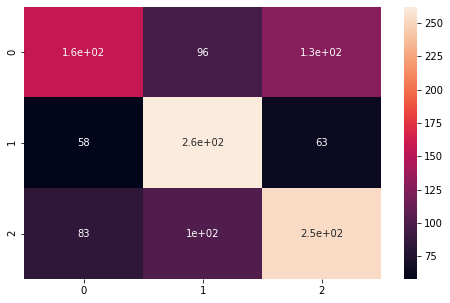

[[157  96 127]
 [ 58 262  63]
 [ 83 101 253]]
Time used : 0.593 seconds
 *-----------------------------------------------------------------------------------------------------*
Multinomial Naive Bayes Accuracy  :   68.17 % F1-Score :  0.671
The confusion Matrix : 


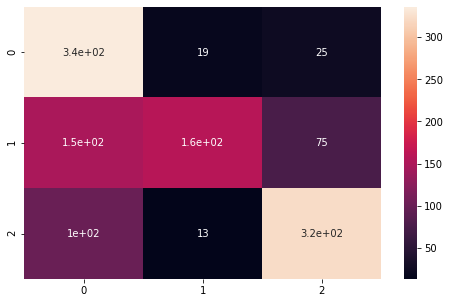

[[336  19  25]
 [149 159  75]
 [101  13 323]]
Time used : 0.207 seconds
 *-----------------------------------------------------------------------------------------------------*
Decision Tree Accuracy  :   81.17 % F1-Score :  0.812
The confusion Matrix : 


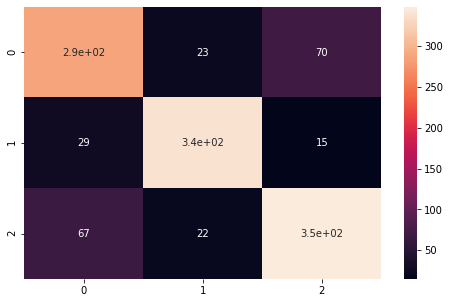

[[287  23  70]
 [ 29 339  15]
 [ 67  22 348]]
Time used : 16.310 seconds
 *-----------------------------------------------------------------------------------------------------*
Random Forest Classifier Accuracy  :   84.33 % F1-Score :  0.843
The confusion Matrix : 


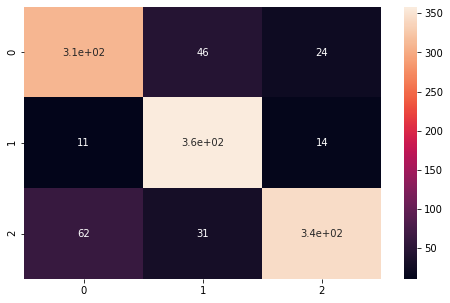

[[310  46  24]
 [ 11 358  14]
 [ 62  31 344]]
Time used : 17.293 seconds
 *-----------------------------------------------------------------------------------------------------*


In [56]:
for name, clf in zip(names, classifiers):
  #Cross validation prediction, and we measure fitting time 
  start = time.time()
  clf.fit(X_train.toarray(),y_train)
  preds = clf.predict(X_test.toarray())
  end = time.time()
  #Metrics
  acc = accuracy_score(y_test,preds)
  f1 = f1_score(y_test,preds, average='weighted')
  cm = confusion_matrix(y_test,preds)
  #Printing results
  print (name, 'Accuracy  :  ', "%.2f" %(acc*100),'%','F1-Score : ',"%.3f" %f1)
  print('The confusion Matrix : ' )
  plt.figure(figsize = (8,5))
  sns.heatmap(cm, annot=True)
  plt.show()
  print(cm)
  #Now we check how long did it take
  print('Time used :', "%.3f" %(end - start), 'seconds')
  print(' *-----------------------------------------------------------------------------------------------------*')

In [44]:
Tfidf_Vect = TfidfVectorizer(ngram_range=(1,2))
X_train = Tfidf_Vect.fit_transform(x_train)
X_test = Tfidf_Vect.transform(x_test)

Gaussian Naive Bayes Accuracy  :   60.92 % F1-Score :  0.609
The confusion Matrix : 


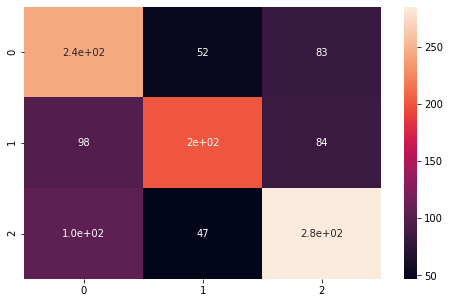

[[245  52  83]
 [ 98 201  84]
 [105  47 285]]
Time used : 5.087 seconds
 *-----------------------------------------------------------------------------------------------------*
Multinomial Naive Bayes Accuracy  :   64.83 % F1-Score :  0.630
The confusion Matrix : 


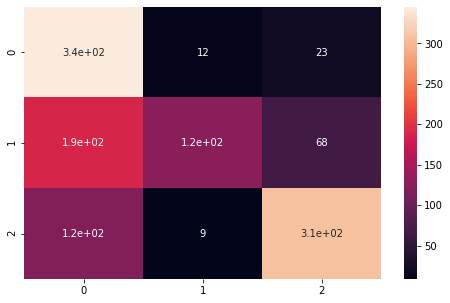

[[345  12  23]
 [190 125  68]
 [120   9 308]]
Time used : 1.020 seconds
 *-----------------------------------------------------------------------------------------------------*
Decision Tree Accuracy  :   82.00 % F1-Score :  0.820
The confusion Matrix : 


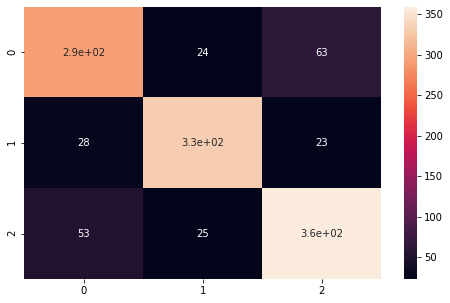

[[293  24  63]
 [ 28 332  23]
 [ 53  25 359]]
Time used : 81.068 seconds
 *-----------------------------------------------------------------------------------------------------*
Random Forest Classifier Accuracy  :   81.67 % F1-Score :  0.816
The confusion Matrix : 


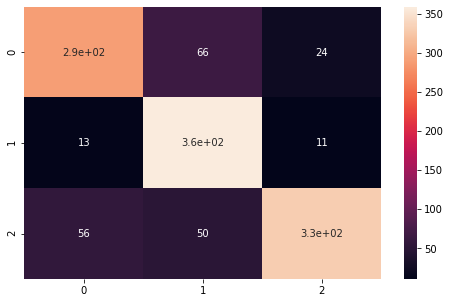

[[290  66  24]
 [ 13 359  11]
 [ 56  50 331]]
Time used : 99.153 seconds
 *-----------------------------------------------------------------------------------------------------*


In [45]:
for name, clf in zip(names, classifiers):
  #Cross validation prediction, and we measure fitting time 
  start = time.time()
  clf.fit(X_train.toarray(),y_train)
  preds = clf.predict(X_test.toarray())
  end = time.time()
  #Metrics
  acc = accuracy_score(y_test,preds)
  f1 = f1_score(y_test,preds, average='weighted')
  cm = confusion_matrix(y_test,preds)
  #Printing results
  print (name, 'Accuracy  :  ', "%.2f" %(acc*100),'%','F1-Score : ',"%.3f" %f1)
  print('The confusion Matrix : ' )
  plt.figure(figsize = (8,5))
  sns.heatmap(cm, annot=True)
  plt.show()
  print(cm)
  #Now we check how long did it take
  print('Time used :', "%.3f" %(end - start), 'seconds')
  print(' *-----------------------------------------------------------------------------------------------------*')

### The best config is using Random Forest Classifier, with n_gram range = 1

### Hyperparameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [63]:
Grid_par = [
    {'n_estimators' : [30,50,100,200],'max_depth' : [10,20,30,None],'bootstrap': [False, True]}]
    
model = RandomForestClassifier()

In [64]:
GridSearch = GridSearchCV(estimator= model , param_grid=Grid_par, cv = 3, scoring='accuracy', return_train_score=True)

In [65]:
Tfidf_Vect = TfidfVectorizer()
X_train = Tfidf_Vect.fit_transform(x_train)
X_test = Tfidf_Vect.transform(x_test)

In [66]:
start = time.time()
GridSearch.fit(X_train,y_train)
end = time.time()

In [67]:
print('Time used : ', end - start ,'Second')

Time used :  176.6885004043579 Second


In [69]:
results = GridSearch.cv_results_

In [75]:
print('Number of estimators : ' , len(results["params"]))
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print ("%.3f" %(mean_score*100),'%',params)

Number of estimators :  32
71.042 % {'bootstrap': False, 'max_depth': 10, 'n_estimators': 30}
72.729 % {'bootstrap': False, 'max_depth': 10, 'n_estimators': 50}
74.083 % {'bootstrap': False, 'max_depth': 10, 'n_estimators': 100}
76.167 % {'bootstrap': False, 'max_depth': 10, 'n_estimators': 200}
75.938 % {'bootstrap': False, 'max_depth': 20, 'n_estimators': 30}
76.312 % {'bootstrap': False, 'max_depth': 20, 'n_estimators': 50}
77.604 % {'bootstrap': False, 'max_depth': 20, 'n_estimators': 100}
78.542 % {'bootstrap': False, 'max_depth': 20, 'n_estimators': 200}
77.417 % {'bootstrap': False, 'max_depth': 30, 'n_estimators': 30}
78.396 % {'bootstrap': False, 'max_depth': 30, 'n_estimators': 50}
78.812 % {'bootstrap': False, 'max_depth': 30, 'n_estimators': 100}
79.438 % {'bootstrap': False, 'max_depth': 30, 'n_estimators': 200}
81.229 % {'bootstrap': False, 'max_depth': None, 'n_estimators': 30}
82.333 % {'bootstrap': False, 'max_depth': None, 'n_estimators': 50}
82.792 % {'bootstrap': Fa

In [78]:
print('The best result is ', "%.3f" %(GridSearch.best_score_*100),'%')
print('Best Parameters : ' , GridSearch.best_estimator_)

The best result is  82.938 %
Best Parameters :  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [79]:
Best_Clf = GridSearch.best_estimator_

In [85]:
#Fitting the best Model
Best_Clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
preds_grid = Best_Clf.predict(X_test)

Random Forest Classifier Accuracy  :   85.58 % F1-Score :  0.843
The confusion Matrix : 


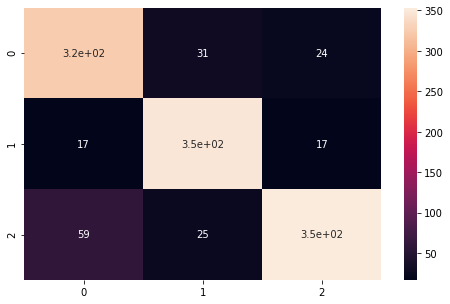

[[325  31  24]
 [ 17 349  17]
 [ 59  25 353]]


In [87]:
#Metrics
acc = accuracy_score(y_test,preds_grid)
f1 = f1_score(y_test,preds, average='weighted')
cm = confusion_matrix(y_test,preds_grid)
#Printing results
print (name, 'Accuracy  :  ', "%.2f" %(acc*100),'%','F1-Score : ',"%.3f" %f1)
print('The confusion Matrix : ' )
plt.figure(figsize = (8,5))
sns.heatmap(cm, annot=True)
plt.show()
print(cm)